# Исследование малокомплектных школ Курской области на основе данных о количестве выпускников c целью оптимизации образовательной инфраструктуры и финансовых затрат на содержание отрасли #


*Проект создан с целью разработки Стратегии развития образования в Курской области на период до
2030 года*

- Значительное количество сельских школ в структуре образовательных организаций региона и их низкая
наполняемость обучающимися предопределяет ситуацию, в которой количество сельских школ в
регионе по своим возможностям значительно превосходит имеющуюся реальную потребность в
местах, что приводит к низкой загруженности педагогических работников ОО региона в целом и,
как результат, резкому увеличению стоимости обучения в расчете на одного ученика.


- Средняя численность обучающихся по уровням общего образования на начало на один класс в Курской области составила всего 14 человек, а по показателю "среднее общее образование"  - 11 человек на класс. В среднем по ЦФО данный
показатель составляет 21 человек на класс, а по Российской Федерации - 20 человек на класс.
Это самый низкий показатель в Российской Федерации, на этом же уровне находятся Орловская
область и Чукотский автономный округ.


- Несмотря на низкую наполняемость в классах малокомплектных школ, а в отдельных
случаях фактически индивидуальное обучение, выпускники сельских малокомплектных школ
демонстрируют более низкие результаты в ходе проведения итоговой аттестации по основным
предметам.Результаты ГИА и ВПР свидетельствуют о более высоком качестве
знаний обучающихся более загруженных городских школ, что обусловлено более эффективной
образовательной средой (квалификацией кадров, материальной базой, включенностью
общественности в контроль и т.д.)


Кроме того,  чем меньше количество обучающихся, тем больше затраты на одного школьника. В одном из районов Курской области затраты **на одного ученика малокомплектной школы** составили **350 тысяч рублей**, в другом районе — **1 миллион 300 тысяч рублей**. При том, что в полнокомплектных школах затраты составляют от 63 до 87 тысяч рублей на одного ребенка в год

*За основу исследования взята информация, выгруженная из базы данных  Федерального реестра сведений о документах об образовании и (или) о квалификации, документах об обучении. В данных содержится информация о количестве выпускников школ всей Курской области с 2000 по 2022 год.*

### Задача ###

- Выявить школы, в которых нет выпускников, изучить их месторасположение и удаленность от центров региона для дальнейшей оптимизации отрасли образования и формирования более эффективной образовательной среды

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('school.xls')

- Изучим датасет,  при наличии неточностей в данных исправим их

In [3]:
df

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,10,17,13,9,14,19,17,14,26,434
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,17,15,13,17,13,14,18,10,6,800
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,59,29,57,58,44,62,51,69,67,3066
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,12,6,17,18,13,10,9,13,12,629
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,7,12,16,11,15,9,12,6,6,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,6,5,0,9,8,12,12,8,10,209
535,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,18,9,10,15,9,9,17,14,13,339
536,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,9,7,13,6,7,9,17,21,11,376
537,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,4,14,12,12,5,9,3,7,4,307


In [4]:
df['ogrn'].value_counts()

1024600616941    2
1024600646135    2
1024600647620    2
1024600645750    1
1024601217013    1
                ..
1024600735708    1
1024600618316    1
1024600617293    1
1024600840527    1
1024600810376    1
Name: ogrn, Length: 536, dtype: int64

- Наблюдаем дублирование школ в данных.Проверим их и при наличии дублей - удалим

In [5]:
df[df['ogrn']== 1024600647620 ]

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
248,муниципальное казенное общеобразовательное учр...,1024600647620,165,153,163,157,168,135,129,112,...,58,68,48,58,59,47,48,46,11,2654
249,Муниципальное казенное общеобразовательное учр...,1024600647620,165,153,163,157,168,135,129,112,...,58,68,48,58,59,47,48,46,11,2654


In [6]:
df[df['ogrn']== 1024600616941]

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,10,17,13,9,14,19,17,14,26,434
33,муниципальное бюджетное общеобразовательное уч...,1024600616941,20,16,27,29,36,24,15,33,...,10,17,13,9,14,19,17,14,26,434


In [7]:
df[df['ogrn']== 1024600646135]

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
529,Областное казенное общеобразовательное учрежд...,1024600646135,8,17,12,11,17,6,14,17,...,16,27,17,18,16,17,18,15,16,474
530,Областное казенное общеобразовательное учрежде...,1024600646135,8,17,12,11,17,6,14,17,...,16,27,17,18,16,17,18,15,16,474


In [8]:
df = df.drop(index=[478])

In [9]:
df = df.drop(index=[253])

In [10]:
df = df.drop(index=[33])

In [11]:
df

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,10,17,13,9,14,19,17,14,26,434
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,17,15,13,17,13,14,18,10,6,800
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,59,29,57,58,44,62,51,69,67,3066
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,12,6,17,18,13,10,9,13,12,629
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,7,12,16,11,15,9,12,6,6,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,6,5,0,9,8,12,12,8,10,209
535,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,18,9,10,15,9,9,17,14,13,339
536,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,9,7,13,6,7,9,17,21,11,376
537,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,4,14,12,12,5,9,3,7,4,307


In [12]:
df = df.reset_index(drop=True)

In [13]:
df

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,10,17,13,9,14,19,17,14,26,434
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,17,15,13,17,13,14,18,10,6,800
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,59,29,57,58,44,62,51,69,67,3066
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,12,6,17,18,13,10,9,13,12,629
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,7,12,16,11,15,9,12,6,6,343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,6,5,0,9,8,12,12,8,10,209
532,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,18,9,10,15,9,9,17,14,13,339
533,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,9,7,13,6,7,9,17,21,11,376
534,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,4,14,12,12,5,9,3,7,4,307


- Избавились от дублей, посмотрим общую статистику по данным

In [14]:
df.describe()

,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
count,5.360000e+02,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,...,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,1.028037e+12,51.236940,51.516791,54.291045,52.473881,53.218284,49.557836,44.001866,40.417910,36.016791,...,29.104478,28.113806,28.108209,27.804104,28.546642,28.503731,28.671642,26.914179,27.498134,1113.548507
std,1.913827e+10,69.873623,68.376963,74.721622,68.693544,71.268971,65.271943,57.609011,51.919679,46.852181,...,39.333849,39.347530,39.837655,40.170441,41.643948,41.811191,42.012330,39.800908,40.620698,1468.998521
min,1.024601e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.024601e+12,10.000000,11.000000,10.000000,10.000000,10.750000,10.000000,9.000000,8.000000,8.000000,...,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,209.000000
50%,1.024601e+12,21.000000,21.000000,21.000000,23.000000,22.500000,21.000000,20.000000,18.000000,16.000000,...,12.000000,11.000000,11.000000,10.000000,10.000000,11.000000,10.000000,9.000000,9.000000,442.000000
75%,1.024601e+12,66.000000,67.000000,67.250000,63.000000,62.000000,58.000000,53.000000,49.250000,43.250000,...,34.000000,33.000000,32.000000,32.250000,34.000000,34.000000,37.000000,34.000000,34.000000,1327.000000
max,1.214600e+12,514.000000,412.000000,518.000000,433.000000,507.000000,466.000000,365.000000,315.000000,299.000000,...,248.000000,249.000000,250.000000,271.000000,252.000000,263.000000,257.000000,259.000000,221.000000,9659.000000


Наблюдаем тенденцию к снижению среднего числа количества выпускников в школах, однако за последние 5 лет количество выпускников можно назвать стабильным

- Выделим школы, в которых к 2022 году не осталось выпускников

In [15]:
zero_school = df[df['year_2022'] == 0]

In [16]:
zero_school

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
43,муниципальное бюджетное общеобразовательное уч...,1024600645167,3,1,3,3,8,2,5,4,...,0,1,4,2,2,0,0,0,0,53
73,Муниципальное бюджетное общеобразовательное уч...,1024600646212,1,2,4,5,4,4,3,2,...,2,0,3,2,3,0,1,3,0,50
167,муниципальное казенное общеобразовательное учр...,1024600810409,13,5,9,15,17,14,28,13,...,5,6,7,3,3,2,5,2,0,246
174,Муниципальное казенное общеобразовательное учр...,1024600735455,0,4,5,3,4,3,5,5,...,0,0,0,0,0,0,0,0,0,76
178,Муниципальное казенное общеобразовательное учр...,1024600784515,4,3,3,2,2,9,8,5,...,2,1,7,5,4,2,1,1,0,95
183,муниципальное казенное общеобразовательное учр...,1024600646938,22,15,16,19,15,17,9,16,...,9,4,4,7,2,2,3,2,0,251
185,Муниципальное казенное общеобразовательное учр...,1034629001582,8,6,8,17,9,4,8,4,...,3,1,4,2,2,1,1,0,0,149
194,муниципальное казенное общеобразовательное учр...,1024601278866,70,87,68,75,59,85,51,53,...,23,27,20,15,0,0,0,0,0,836
221,муниципальное казенное общеобразовательное учр...,1024600647829,7,16,9,21,13,16,10,2,...,8,3,3,5,0,3,3,2,0,178
231,Муниципальное казенное общеобразовательное учр...,1024600782601,10,8,2,4,7,9,2,4,...,3,2,1,3,4,0,0,0,0,79


Назовем маленькими школы с количеством выпускников до 5 человек

In [17]:
small_school = df[df['year_2022']<5]

In [18]:
small_school

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
10,муниципальное бюджетное общеобразовательное уч...,1024600736863,17,26,23,20,23,22,22,11,...,10,9,11,7,14,8,12,12,3,465
11,муниципальное бюджетное общеобразовательное уч...,1024600735070,10,4,8,3,8,4,3,3,...,3,3,2,1,0,6,1,0,1,125
20,муниципальное бюджетное общеобразовательное уч...,1024600616963,13,17,23,22,12,19,8,10,...,12,8,7,4,4,8,7,7,4,293
21,муниципальное бюджетное общеобразовательное уч...,1024600617150,17,14,20,16,16,18,12,13,...,3,12,3,11,5,5,10,8,4,285
23,муниципальное бюджетное общеобразовательное уч...,1024600733761,13,13,4,20,3,14,10,7,...,8,6,15,8,3,6,3,2,2,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,муниципальное общеобразовательное учреждение С...,1024600664660,9,12,9,11,8,5,0,5,...,5,5,4,3,2,1,0,4,1,154
509,"муниципальное общеобразовательное учреждение ""...",1024600661898,33,33,24,42,33,27,27,25,...,7,12,16,11,9,13,5,13,4,481
511,мунципальное общеобразовательное учреждение Кр...,1024600664550,6,7,8,7,13,10,4,7,...,2,0,1,2,1,3,2,0,2,148
528,Областное казенное общеобразовательное учрежде...,1024600618790,17,13,13,21,27,23,23,14,...,13,14,8,9,7,8,8,4,0,309


Предположим, что большие - это школы, выпускаюшие свыше 60 человек

In [19]:
big_school = df[df['year_2022']>60]

In [20]:
big_school

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,59,29,57,58,44,62,51,69,67,3066
15,Муниципальное бюджетное общеобразовательное уч...,1024601277348,122,114,126,117,112,107,106,84,...,102,68,90,84,107,72,83,71,66,3401
16,муниципальное бюджетное общеобразовательное уч...,1034637013124,270,311,337,285,314,276,271,274,...,130,165,150,192,178,192,205,197,149,6745
17,муниципальное бюджетное общеобразовательное уч...,1024601276700,190,178,97,181,200,174,169,144,...,95,114,104,126,178,115,93,14,95,3612
18,муниципальное бюджетное общеобразовательное уч...,1024600972220,106,121,152,138,140,112,143,132,...,162,148,153,138,131,148,125,145,140,3649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Муниципальное общеобразовательное учреждение С...,1024601215671,213,121,173,241,231,222,254,177,...,181,186,179,161,157,144,134,138,149,5316
507,Муниципальное общеобразовательное учреждение С...,1024601219741,182,134,165,200,207,214,164,162,...,82,85,78,82,102,103,132,109,125,4072
512,Областное бюджетное общеобразовательное учрежд...,1024600971075,92,87,78,93,93,118,118,130,...,91,80,105,80,97,75,82,77,66,2057
513,Областное бюджетное общеобразовательное учрежд...,1024600617469,244,120,283,89,176,202,97,182,...,73,89,82,104,99,94,88,78,91,3566


- Посмотрим сколько детей выпускает самая большая школа

In [21]:
big_school['year_2022'].max()

221

In [22]:
big_school[big_school['year_2022']==221]

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum
138,муниципальное бюджетное общеобразовательное уч...,1024600957941,219,335,326,304,250,262,160,217,...,158,180,173,183,169,213,195,194,221,7269


**в 2022 году самое большое количество выпускников было в  городской МБОУ "ШКОЛА № 52"**

Посмотрим распределение количества выпускников  по школам в 2022 году

<AxesSubplot:>

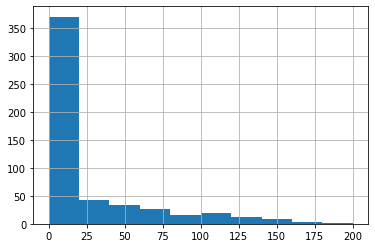

In [23]:
df['year_2022'].hist(range=(0, 200))

**Исходя из графика видим, что большая часть школ выпускает до 25 выпускников**

<AxesSubplot:>

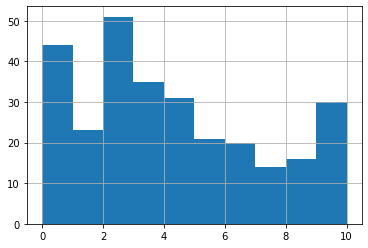

In [24]:
df['year_2022'].hist(range=(0, 10))   

Видим распределение количества школ, выпускающих до 10 выпускников

**Поделим школы на группы в зависимости от количества выпускников. Каждой школе присвоим группу :**
- zero - школы,  которые никого не выпустили
- small - школы, которые выпускают до 5 человек
- middle - школы, которые выпускают от 5 до 60 человек
- big  - школы, выпускающие свыше 60 человек

In [25]:
def school_type(row):
    if row['year_2022'] == 0:
        return 'zero'
    elif row['year_2022'] <= 5:
        return 'small'
    elif row['year_2022'] >60:
        return 'big'
    else:
        return 'middle'

In [26]:
df['school_type'] = df.apply(school_type, axis=1)

In [27]:
df.head()

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum,school_type
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,17,13,9,14,19,17,14,26,434,middle
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,15,13,17,13,14,18,10,6,800,middle
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,29,57,58,44,62,51,69,67,3066,big
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,6,17,18,13,10,9,13,12,629,middle
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,12,16,11,15,9,12,6,6,343,middle


Посмотрим распределение школ по сформированнымм группам 

<AxesSubplot:>

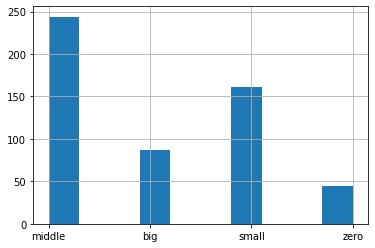

In [28]:
df['school_type'].hist()

**Для исследования расположения школ, входящих в нулевую группу возьмем адреса из базы данных Единого реестра видов контроля и соединим с нашим датасетом,   используя в качестве id огрн**

In [29]:
df_risk = pd.read_excel('risk.xlsx')

In [30]:
df_full = df.merge(df_risk, how='left', left_on='ogrn', right_on='ogrn')

In [31]:
df_full

,name_x,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2020,year_2021,year_2022,sum,school_type,name_y,adress,inn,risk_cat,Unnamed: 5
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,17,14,26,434,middle,муниципальное бюджетное общеобразовательное уч...,"305500, Курская область, Курский район, п. Сах...",4.611006e+09,Низкий риск,NaN
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,18,10,6,800,middle,муниципальное бюджетное общеобразовательное уч...,"306235, Курская область, Обоянский район, село...",4.616005e+09,Низкий риск,NaN
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,51,69,67,3066,big,муниципальное бюджетное общеобразовательное уч...,"305018, Курская облатсь, город Курск, улица Че...",4.632201e+09,Низкий риск,NaN
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,9,13,12,629,middle,муниципальное бюджетное общеобразовательное уч...,"306240, Курская область, Обоянский район, село...",4.616006e+09,Низкий риск,NaN
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,12,6,6,343,middle,Муниципальное бюджетное общеобразовательное уч...,"307724, Курская область, Льговский район, с. Б...",4.613004e+09,Низкий риск,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,12,8,10,209,middle,Образовательная организация - частное учрежден...,"305004, Курская область, город Курск, улица Ле...",4.632133e+09,Низкий риск,NaN
540,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,17,14,13,339,middle,Областное казенное общеобразовательное учрежде...,"305014, г. Курск, ул. Смородиновая, 2",4.629043e+09,Низкий риск,NaN
541,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,17,21,11,376,middle,Областное казенное общеобразовательное учрежде...,"Курская область, 305018, г. Курск, проспект Ку...",4.630026e+09,Низкий риск,NaN
542,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,3,7,4,307,small,Областное казённое общеобразовательное учрежде...,"306720, Курская область, Касторенский район, п...",4.608001e+09,Низкий риск,NaN


In [32]:
df_full = df_full.drop(columns=['name_y','inn'], axis=1) #удалим лишние столбцы

In [33]:
df_full = df_full.rename(columns={'name_x':'name'})

In [34]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         544 non-null    object 
 1   ogrn         544 non-null    int64  
 2   year_2000    544 non-null    int64  
 3   year_2001    544 non-null    int64  
 4   year_2002    544 non-null    int64  
 5   year_2003    544 non-null    int64  
 6   year_2004    544 non-null    int64  
 7   year_2005    544 non-null    int64  
 8   year_2006    544 non-null    int64  
 9   year_2007    544 non-null    int64  
 10  year_2008    544 non-null    int64  
 11  year_2009    544 non-null    int64  
 12  year_2010    544 non-null    int64  
 13  year_2011    544 non-null    int64  
 14  year_2012    544 non-null    int64  
 15  year_2013    544 non-null    int64  
 16  year_2014    544 non-null    int64  
 17  year_2015    544 non-null    int64  
 18  year_2016    544 non-null    int64  
 19  year_201

Проверим школы, у которых не нашелся адрес

In [35]:
df_full[df_full['adress'].isnull()]

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2018,year_2019,year_2020,year_2021,year_2022,sum,school_type,adress,risk_cat,Unnamed: 5
43,муниципальное бюджетное общеобразовательное уч...,1024600645167,3,1,3,3,8,2,5,4,...,2,0,0,0,0,53,zero,NaN,NaN,NaN
175,Муниципальное казенное общеобразовательное учр...,1024600735455,0,4,5,3,4,3,5,5,...,0,0,0,0,0,76,zero,NaN,NaN,NaN
186,Муниципальное казенное общеобразовательное учр...,1034629001582,8,6,8,17,9,4,8,4,...,2,1,1,0,0,149,zero,NaN,NaN,NaN
233,Муниципальное казенное общеобразовательное учр...,1024600782601,10,8,2,4,7,9,2,4,...,4,0,0,0,0,79,zero,NaN,NaN,NaN
243,Муниципальное казенное общеобразовательное учр...,1024600663471,7,13,8,8,5,8,4,2,...,2,0,0,0,0,94,zero,NaN,NaN,NaN
249,Муниципальное казенное общеобразовательное учр...,1034629001505,7,0,11,4,10,8,3,4,...,4,3,1,0,0,133,zero,NaN,NaN,NaN
255,Муниципальное казенное общеобразовательное учр...,1024601277601,0,7,6,5,5,4,2,1,...,1,0,0,0,0,51,zero,NaN,NaN,NaN
272,Муниципальное казенное общеобразовательное учр...,1024600787452,9,3,3,1,4,0,1,3,...,1,4,1,0,0,50,zero,NaN,NaN,NaN
275,Муниципальное казенное общеобразовательное учр...,1024600730660,7,15,8,22,14,20,16,7,...,0,0,0,0,0,199,zero,NaN,NaN,NaN
302,Муниципальное казенное общеобразовательное учр...,1024601277612,8,4,3,3,5,8,5,7,...,3,2,2,0,0,80,zero,NaN,NaN,NaN


**Сверили данные с реестром лицензий.  Указанные школы в процессе ликвидации. Их можем не считать**

In [37]:
df_full = df_full.dropna(subset=['adress', 'risk_cat']) #удалим строки с пустыми значениями

In [38]:
df_full

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2018,year_2019,year_2020,year_2021,year_2022,sum,school_type,adress,risk_cat,Unnamed: 5
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,14,19,17,14,26,434,middle,"305500, Курская область, Курский район, п. Сах...",Низкий риск,NaN
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,13,14,18,10,6,800,middle,"306235, Курская область, Обоянский район, село...",Низкий риск,NaN
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,44,62,51,69,67,3066,big,"305018, Курская облатсь, город Курск, улица Че...",Низкий риск,NaN
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,13,10,9,13,12,629,middle,"306240, Курская область, Обоянский район, село...",Низкий риск,NaN
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,15,9,12,6,6,343,middle,"307724, Курская область, Льговский район, с. Б...",Низкий риск,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,8,12,12,8,10,209,middle,"305004, Курская область, город Курск, улица Ле...",Низкий риск,NaN
540,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,9,9,17,14,13,339,middle,"305014, г. Курск, ул. Смородиновая, 2",Низкий риск,NaN
541,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,7,9,17,21,11,376,middle,"Курская область, 305018, г. Курск, проспект Ку...",Низкий риск,NaN
542,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,5,9,3,7,4,307,small,"306720, Курская область, Касторенский район, п...",Низкий риск,NaN


In [39]:
df_full.info() #Проверим, не утерялись ли данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 543
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         522 non-null    object 
 1   ogrn         522 non-null    int64  
 2   year_2000    522 non-null    int64  
 3   year_2001    522 non-null    int64  
 4   year_2002    522 non-null    int64  
 5   year_2003    522 non-null    int64  
 6   year_2004    522 non-null    int64  
 7   year_2005    522 non-null    int64  
 8   year_2006    522 non-null    int64  
 9   year_2007    522 non-null    int64  
 10  year_2008    522 non-null    int64  
 11  year_2009    522 non-null    int64  
 12  year_2010    522 non-null    int64  
 13  year_2011    522 non-null    int64  
 14  year_2012    522 non-null    int64  
 15  year_2013    522 non-null    int64  
 16  year_2014    522 non-null    int64  
 17  year_2015    522 non-null    int64  
 18  year_2016    522 non-null    int64  
 19  year_201

In [40]:
df_full = df_full.drop('Unnamed: 5', axis=1) #удалим столбец

In [41]:
df_full

,name,ogrn,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,sum,school_type,adress,risk_cat
0,Лебяженский филиал муниципального бюджетного о...,1024600616941,20,16,27,29,36,24,15,33,...,9,14,19,17,14,26,434,middle,"305500, Курская область, Курский район, п. Сах...",Низкий риск
1,муниципальное бюджетное обдщеобразовательное у...,1024600730681,28,38,32,46,46,47,37,36,...,17,13,14,18,10,6,800,middle,"306235, Курская область, Обоянский район, село...",Низкий риск
2,муниципальное бюджетное образовательное учрежд...,1154632002051,167,184,169,163,120,125,86,89,...,58,44,62,51,69,67,3066,big,"305018, Курская облатсь, город Курск, улица Че...",Низкий риск
3,муниципальное бюджетное общеобразовательное уч...,1024600733838,28,25,29,26,45,14,32,13,...,18,13,10,9,13,12,629,middle,"306240, Курская область, Обоянский район, село...",Низкий риск
4,Муниципальное бюджетное общеобразовательное уч...,1024600645805,19,22,17,21,25,20,20,22,...,11,15,9,12,6,6,343,middle,"307724, Курская область, Льговский район, с. Б...",Низкий риск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Областное казенное общеобразовательное учрежде...,1024600748039,4,7,8,10,12,5,9,8,...,9,8,12,12,8,10,209,middle,"305004, Курская область, город Курск, улица Ле...",Низкий риск
540,Областное казенное общеобразовательное учрежде...,1034637019670,10,5,10,15,8,12,10,7,...,15,9,9,17,14,13,339,middle,"305014, г. Курск, ул. Смородиновая, 2",Низкий риск
541,Областное казенное общеобразовательное учрежде...,1034637006359,12,10,13,10,10,12,7,7,...,6,7,9,17,21,11,376,middle,"Курская область, 305018, г. Курск, проспект Ку...",Низкий риск
542,Областное казённое общеобразовательное учрежде...,1024600580223,8,6,14,0,13,27,12,14,...,12,5,9,3,7,4,307,small,"306720, Курская область, Касторенский район, п...",Низкий риск


In [42]:
df_full.to_excel('dffull.xlsx', index=False)   #сохраним чистый датасет  в отдельный файл

**Создадим сводную таблицу с минимальным,максимальным и средним значением выпускников за 2022 год в каждом типе школ**

In [43]:
group_2022 = pd.pivot_table(df_full,
               index=['school_type'],
               values=['year_2022'], 
               aggfunc={'year_2022': np.mean,
                        'year_2022': [min, max, np.mean]})

In [44]:
group_2022

year_2022                  
                  max        mean   min
school_type                            
big             221.0  107.793103  61.0
middle           60.0   20.141700   6.0
small             5.0    2.841463   1.0
zero              0.0    0.000000   0.0

<AxesSubplot:xlabel='school_type', ylabel='year_2022'>

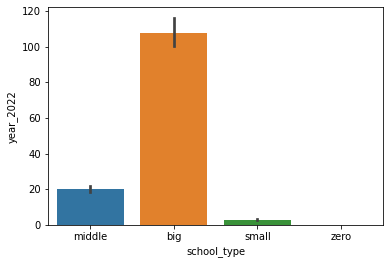

In [45]:
sns.barplot(data=df_full, x='school_type', y='year_2022')

**Посмотрим общее количество школ в каждой группе**

In [46]:
c_2022 = pd.pivot_table(df_full, columns='school_type', values=['year_2022'], aggfunc='count')

In [47]:
c_2022

school_type,big,middle,small,zero
year_2022,87,247,164,24


***Получилось 24 действующие школы, в которых нет выпускников***

In [58]:
zero = df_full[df_full['school_type'] == 'zero']

**Определим географические координаты и нанесем их на карту Курской области для наглядности. 
Геокодируем имеющиеся адреса.
Использовать для визуализации будем  Yandex DataLens**

https://datalens.yandex.ru/preview/p4iwhc32ricef-adresa-shkol-karta

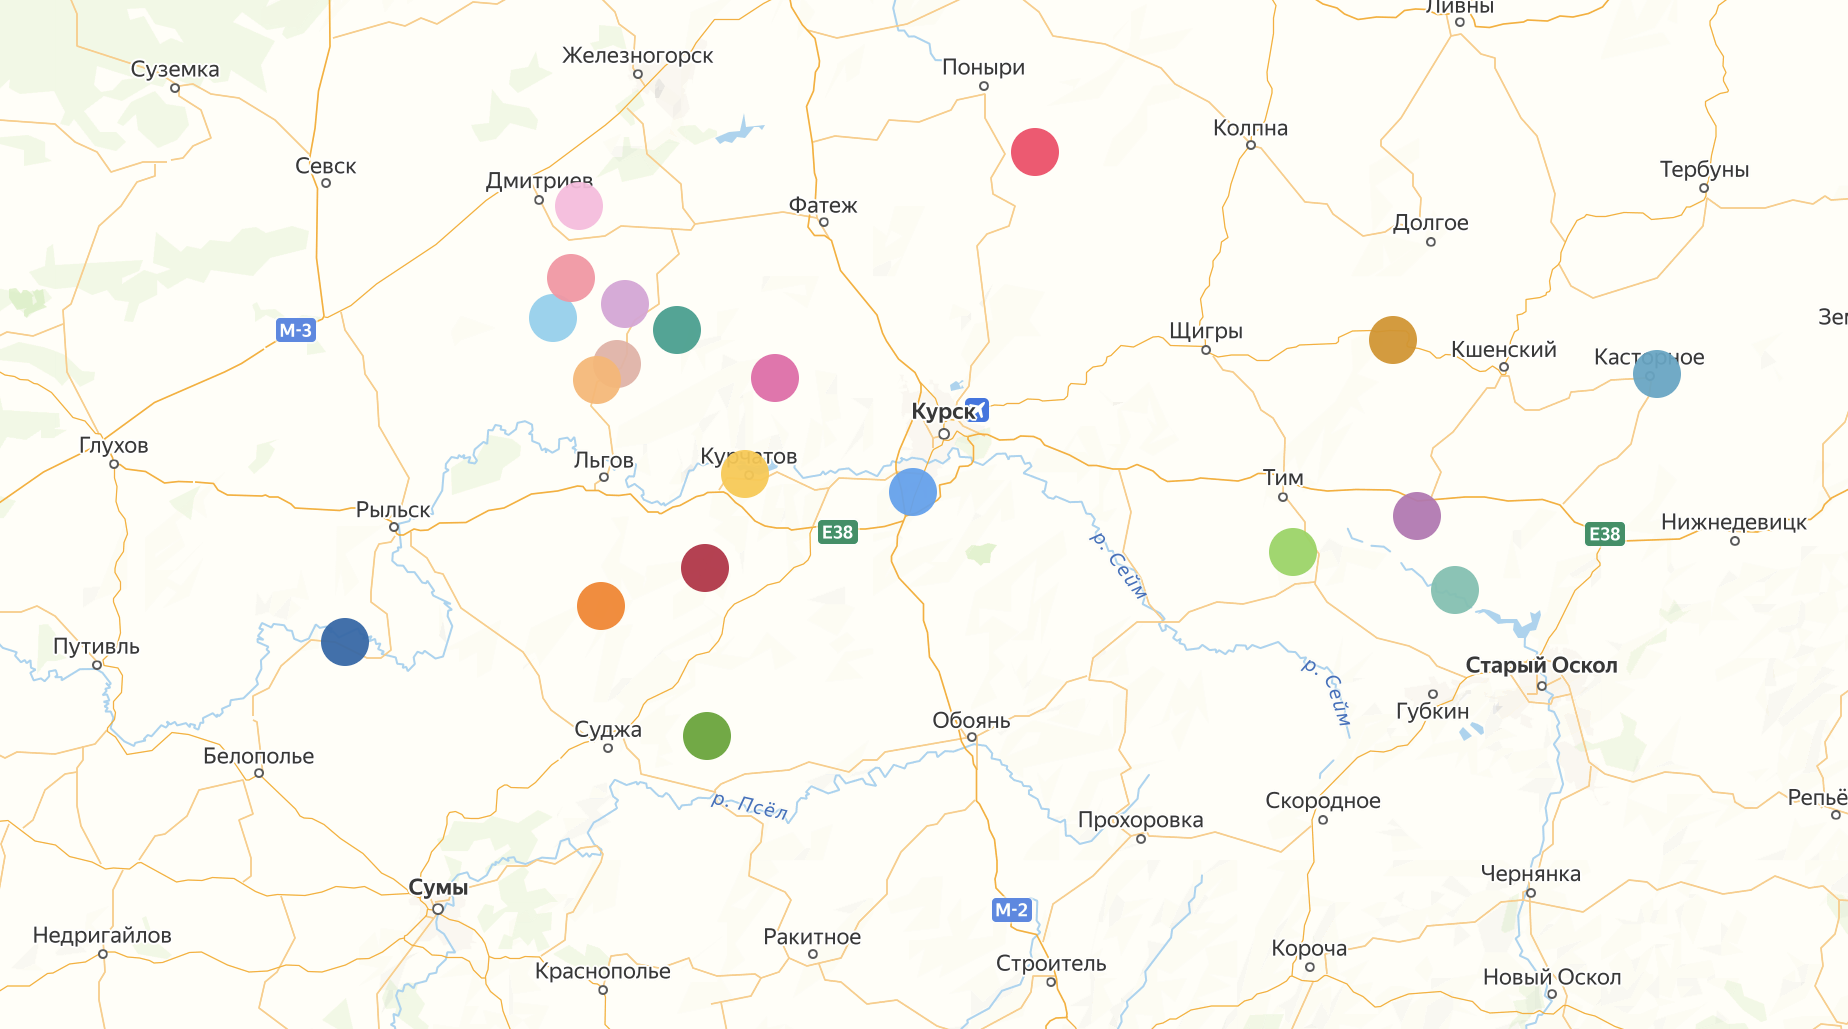

In [68]:
from IPython import display
display.Image("zero.png")

**Видим, что большее количество школ без выпускников сосредоточено в Конышевском районе**


In [69]:

pd.set_option("max_colwidth", 400)

In [70]:
zero['adress']

73                                               307730, Курская область, Льговский район, д. Семеновка
168                  306006, Курская область, Поныровский район, с/с Горяйновский, с. Бобровка, дом 54а
179                             307846, Курская область, Большесолдасткий район, деревня Будище, дом 88
184                                            307631, Курская область, Конышевский район, село Беляево
196                              307251, Курская область, город Курчатов, проспект Коммунистический,  8
223                 307614, Курская область, Конышевский район, деревня Васильевка, дом 35, помещение 1
241                                      307602, Курская область, Конышевский район, село Старая Белица
283                                              307610, Курская область, Конышевский район, с. Машкино
291                          306700, Курская область, Касторенский район, п. Касторное, ул. Ленина, 138
307                306842,  Курская область, Горшеченский район,

**Посмотрим как выглядит карта школ, в которых было меньше 5 выпускников**

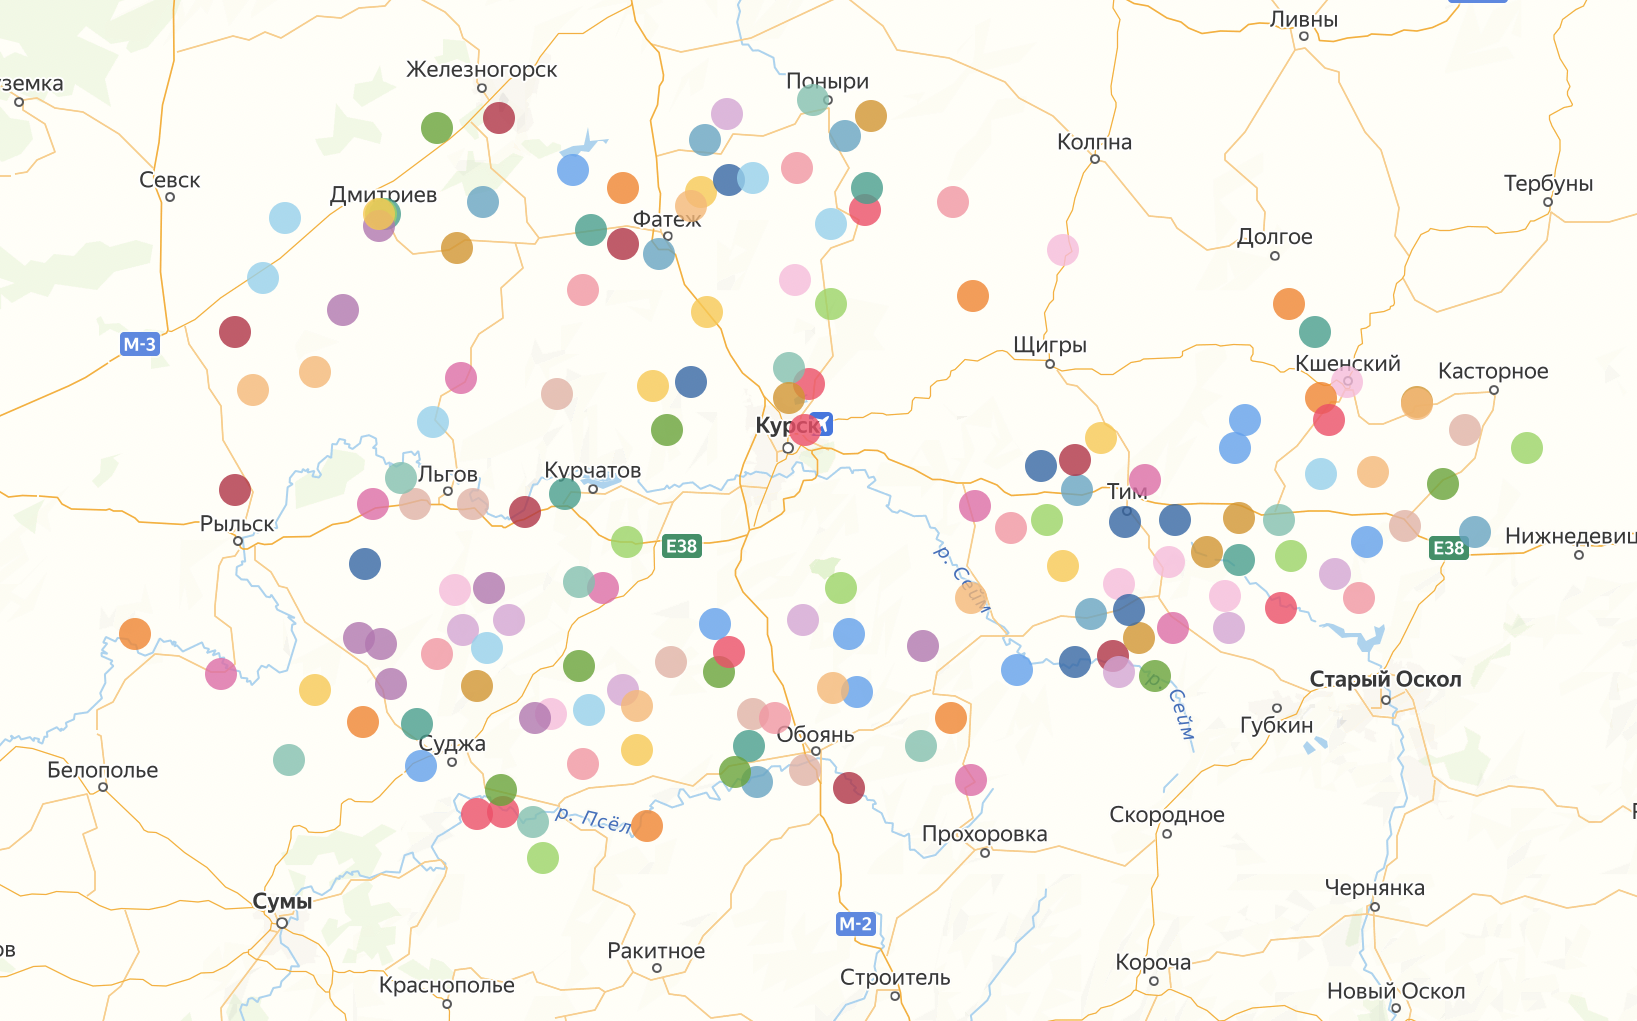

In [71]:
from IPython import display
display.Image("small.png")

In [74]:
df_small = pd.read_csv('smallcomb.csv')

In [75]:
df_small['adress']


0                                305530, Курская область, Курский район, д. Букреевка, д. 2
1              306251, Курская область, Обоянский район, с. Быканово, ул. Молодежная, д. 14
2        306265, Курская область, Обоянский район, село Верхнее Бабино ул. Бугряновка, д.25
3                   307720, Курская область, Льговский район, п. Селекционный, ул. Школьная
4                                 305518, Курская область, Курский район, с. Глебово, д. 37
                                               ...                                         
159         307013, Курская область, Мантуровский район, с. Останино, ул. Центральная, д.96
160     307019, Курская область, Мантуровский район, село Свинец, улица  Центральная, д. 28
161             307020, Курская область, Мантуровский район, с. Ястребовка, ул. Мира, д. 95
162    307025 Курская область, Мантуровский район, село Крутые Верхи, улица Школьная, д. 76
163           306720, Курская область, Касторенский район, пос. Лачиново, ул.Шко

In [113]:
zeroadress = pd.read_excel('zeroadress.xlsx')

In [124]:
zeroadress.loc[zeroadress.place.str.contains('Конышевский')]

,schooltypes,index,region,place,city,house,homenumber,Unnamed: 7
8,zero,307631,Курская область,Конышевский район,село Беляево,NaN,NaN,NaN
9,zero,307614,Курская область,Конышевский район,деревня Васильевка,дом 35,помещение 1,NaN
10,zero,307602,Курская область,Конышевский район,село Старая Белица,NaN,NaN,NaN
11,zero,307610,Курская область,Конышевский район,с. Машкино,NaN,NaN,NaN
12,zero,307630,Курская область,Конышевский район,с. Черничено,NaN,NaN,NaN
13,zero,307623,Курская область,Конышевский район,село Глазово,NaN,NaN,NaN
14,zero,307620,Курская область,Конышевский район,рабочий поселок Конышевка,улица Школьная,"дом 8 ""Г""",NaN
15,zero,307605,Курская область,Конышевский район,с. Толкачевка,NaN,NaN,NaN
16,zero,307624,Курская область,Конышевский район,с. Малое Городьково,NaN,NaN,NaN


In [125]:
zeroadress.loc[zeroadress.place.str.contains(' Конышевский')]

,schooltypes,index,region,place,city,house,homenumber,Unnamed: 7
8,zero,307631,Курская область,Конышевский район,село Беляево,NaN,NaN,NaN
9,zero,307614,Курская область,Конышевский район,деревня Васильевка,дом 35,помещение 1,NaN
10,zero,307602,Курская область,Конышевский район,село Старая Белица,NaN,NaN,NaN
11,zero,307610,Курская область,Конышевский район,с. Машкино,NaN,NaN,NaN
12,zero,307630,Курская область,Конышевский район,с. Черничено,NaN,NaN,NaN
14,zero,307620,Курская область,Конышевский район,рабочий поселок Конышевка,улица Школьная,"дом 8 ""Г""",NaN
15,zero,307605,Курская область,Конышевский район,с. Толкачевка,NaN,NaN,NaN
16,zero,307624,Курская область,Конышевский район,с. Малое Городьково,NaN,NaN,NaN


In [131]:
zeroadress.loc[13, 'place']='Конышевский район'

In [132]:
zeroadress['place'] = zeroadress['place'].apply(lambda x: x.lstrip(' '))

In [134]:
zeroadress.place.value_counts()

Конышевский район         9
Курский район             1
город Курчатов            1
Поныровский район         1
Большесолдатский район    1
Октябрьский район         1
Горшеченский район        1
Льговский район           1
Советский район           1
Глушковский район         1
Касторенский район        1
Дмитриевский район        1
Большесолдасткий район    1
Мантуровский район        1
Курчатовский район        1
Тимский район             1
Name: place, dtype: int64

**Видим,что в Конышевский район занимимает лидирующую позицию по количеству школ, в которых отсутствуют выпускники**

В указанном районе требуется провести оптимизацию образовательных организаций

Посмотрим количество школ в разрезе районов  , которые выпустили менее 5 обучающихся в разрезе районов

In [136]:
smalladress = pd.read_excel('smalladress.xlsx')

In [137]:
smalladress.place.value_counts()

 Мантуровский район                                     13
 Обоянский район                                        10
 Советский район                                         9
 Суджанский район                                        9
 Фатежский район                                         9
 Тимский район                                           9
 Дмитриевский район                                      7
 Поныровский район                                       7
 Большесолдатский район                                  7
 Медвенский район                                        7
 Солнцевский район                                       7
 Льговский район                                         6
 Касторенский район                                      6
 Горшеченский район                                      5
 Золотухинский район                                     5
 Кореневский район                                       5
 Железногорский район                                   

## Вывод

***Из полученной нами в ходе анализа информации, примерный план  по приоритетным районам, требующим оптимизации общеобразовательных школ выглядит следующим образом:***


 - В первую очередь стоит обратить особое внимание на размещение школ  Конышевского района, в которых отсутствуют выпускники, далее  определение в указанном районе близлежайших школ, в которых можно осуществить перевод обучающихся и педагогического состава

- Далее в районах 

Курский район             
город Курчатов            
Поныровский район         
Большесолдатский район    
Октябрьский район         
Горшеченский район        
Льговский район           
Советский район           
Глушковский район         
Касторенский район        
Дмитриевский район        
Большесолдасткий район    
Мантуровский район        
Курчатовский район        
Тимский район             

определяем контингет школ,   в которых не было выпускников, если контингент минимальный - юридическое лицо ликвидируем, если есть перспектива по контингенту - определяем как филиал


- Следующим этапом строим прогноз на ближайшие 5 лет по имеющимся данным проживающих в регионе семей по школам из списка лидеров районов из числа школ, попавших в список выпускающих менее 5 человек в год

Мантуровский район                                     
Обоянский район                                        
Советский район                                         
Суджанский район                                        
Фатежский район                                         
Тимский район                                           
Дмитриевский район                                      
Поныровский район                                       
Большесолдатский район                                  
Медвенский район                                        
Солнцевский район                                       
Льговский район                                         
Касторенский район                                      
